In [1]:
import torch
torch.cuda.empty_cache()
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.9.1
True
True


In [2]:
from fastai.imports import *
from fastai.vision.all import *
from sklearn.metrics import roc_curve, auc
from fastai.vision.all import *
%matplotlib inline
from nbdev.showdoc import *


In [3]:
path = Path('canon_data_org')
Path.BASE_PATH = path # display all paths relative to dataset root
path.ls()

(#3) [Path('models'),Path('train'),Path('val')]

In [4]:
from fastai.vision.core import PILImage
class HistogramEqualization_item(Transform):

     def init(self, prefix=None):
        self.prefix = prefix
        def encodes(self, o):
            if type(o) == PILImage:
                ret = PIL.ImageOps.equalize(o)
            else:
                ret = o
        return ret
def decodes(self, o):
    return o

In [6]:
dls = ImageDataLoaders.from_folder(
    path, bs=32,train = 'train',valid='val',
    item_tfms=[Resize(512), HistogramEqualization_item()],
    batch_tfms=[*aug_transforms(size=512, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [ ]:
dls.show_batch(max_n = 4, figsize=(7,7))

In [7]:
learn = cnn_learner(dls,resnet34, metrics=[accuracy]).to_fp16()

In [8]:
learn.fit_one_cycle(10,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.153846,0.863958,0.767947,07:43
1,0.796296,0.721223,0.752922,07:22
2,0.790021,0.765477,0.764190,07:26
3,0.718267,0.632621,0.795492,07:28
4,0.636252,0.604266,0.798414,07:29
5,0.619195,0.588569,0.818030,07:37
6,0.553759,0.557467,0.811770,07:18
7,0.513324,0.497405,0.837646,07:37
8,0.499403,0.496785,0.837229,07:37
9,0.466845,0.491888,0.837229,07:32


In [9]:
learn.save('canon_org_resnet50')

Path('models/canon_org_resnet50.pth')

In [19]:
learn.fit_one_cycle(10,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.632952,0.974880,0.704508,09:03
1,0.902929,0.759967,0.756260,08:59
2,0.766772,0.685930,0.785476,08:56
3,0.672505,0.710515,0.766694,09:00
4,0.653805,0.613450,0.791319,08:56
5,0.601794,0.576781,0.806761,08:58
6,0.574843,0.557148,0.809265,09:00
7,0.519324,0.566811,0.810518,08:58
8,0.507159,0.538545,0.817613,08:58
9,0.504874,0.537718,0.816778,09:00


In [20]:
learn.save('canon_org_resnet34_1024')

Path('models/canon_org_resnet34_1024.pth')

In [15]:
learn.fit_one_cycle(10,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.619946,1.080080,0.656093,08:24
1,0.878204,0.717919,0.770033,06:31
2,0.774620,0.739031,0.738731,06:31
3,0.683566,0.698361,0.765025,06:38
4,0.654396,0.644919,0.796745,06:30
5,0.621137,0.585419,0.805927,06:43
6,0.587327,0.596621,0.799249,06:30
7,0.543686,0.583580,0.806344,06:28
8,0.512538,0.575874,0.805509,06:32
9,0.499651,0.571138,0.809265,06:50


In [15]:
learn.fit_one_cycle(10,5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.799557,4.737248,0.717446,09:37
1,0.615979,7.777035,0.717028,07:50
2,0.562331,6.391195,0.716611,07:53
3,0.487523,6.985601,0.715359,08:06
4,0.439374,12.872912,0.715359,07:49
5,0.384994,13.207685,0.716194,08:09
6,0.346408,11.368187,0.716194,08:14
7,0.291976,9.285330,0.716194,08:16
8,0.279183,11.142306,0.716194,08:05
9,0.248268,11.027688,0.716194,08:10


In [8]:
learn.load("canon_org_resnet34_80")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

In [ ]:
learn.save('canon_org_resnet34_80')

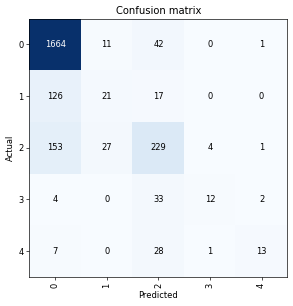

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
c = interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

### Saving the Probabilities for each image.

In [ ]:
y_prob =learn.get_preds()
df=pd.DataFrame(np.column_stack(y_prob),columns=['0','1','2','3','4','ground_truth'])
df.to_csv('cdc.csv', index=False)

### Testing the model on Unseen Data

In [14]:
#predictions on whole Dataset
test_files = [fn for fn in sorted((path/'canon_300').glob('**/*')) if fn.is_file()]
test_dl = learn.dls.test_dl(test_files)
preds, _ = learn.get_preds(dl=test_dl)
df_test=pd.DataFrame(preds,columns=['0','1','2','3','4'])
df_test.to_csv('canon_data_org/canon_300.csv', index=False)
